<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Intro to Regression with Tensorflow & Keras

_Author: Unknown_

------

**OBJECTIVES**

- Build regression models using `tensorflow` & `keras`
- Refine models by adjusting the architecture of a network
- Use regularization to attempt performance improvement
- Save and reuse the model

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
cali = fetch_california_housing()
X, y = cali.data, cali.target

### Part 1

Load the california housing data and create a dataframe called `cali_df` below.  Make sure to add the target feature and name this `price`. 

In [3]:
# Convert X, y to DataFrame
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [4]:
price = pd.DataFrame({"price":cali.target})
price

,price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [5]:
# Rename target feature as price
y = y.rename(columns={0:'price'})

In [6]:
cali_df = pd.DataFrame(data=cali.data, columns = cali.feature_names )
cali_df.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22


In [7]:
# Join price columns to clai_df
cali_df = cali_df.join(price)
cali_df.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


In [8]:
#Check
cali_df.shape

(20640, 9)

### Part 2

Create a train/test split using some of the features in your X and setting y to be the `price` column.

In [9]:
#Define X,y
X = cali_df.drop(columns='price')
y = cali_df['price']

In [10]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [11]:
# Check
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [12]:
# Scale X_train and X_test
sc = StandardScaler()

# Fit
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

### Part 3

Setup a `Sequential` model with one layer containing 24 nodes.  Make sure to include the output layer and use a `ReLU` activation for the hidden layer.

In [13]:
# Insert model here...
model = Sequential()


# Input layer
model.add(Dense(32, activation="relu", input_shape = (8,)))

# Hidden layer
model.add(Dense(24, activation="relu"))

# Output layer
model.add(Dense(1,activation=None))


2022-10-30 23:18:41.738296: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Set up the compilation of the network.  Use an `adam` optimizer and appropriate loss function with the mean squared error metric.

In [14]:
# Compile
model.compile(loss='bce', optimizer='adam', metrics=['accuracy'])


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 24)                792       
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,105
Trainable params: 1,105
Non-trainable params: 0
_________________________________________________________________


### Part 4

Fit the model on the training data with 100 epochs (and sequester the output with `verbose = 0`). Save the fit model to the variable `history`.

In [16]:
# Fit
history = model.fit(X_train_sc, y_train, epochs=100,
                    batch_size = 64,
                    verbose = 0,
                    validation_data= (X_test_sc, y_test)
                   )

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 24)                792       
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,105
Trainable params: 1,105
Non-trainable params: 0
_________________________________________________________________


In [18]:
history_diff = model.fit(X_train_sc, 
                    y_train,
                    epochs=100,
                    batch_size=5,
                    validation_data=(X_test_sc, y_test),
                    verbose=0)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 24)                792       
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,105
Trainable params: 1,105
Non-trainable params: 0
_________________________________________________________________


### Part 5

Use `matplotlib` to plot the training loss and validation loss, and the training mean squared error alongside the validation data.  Side by side subplots please.

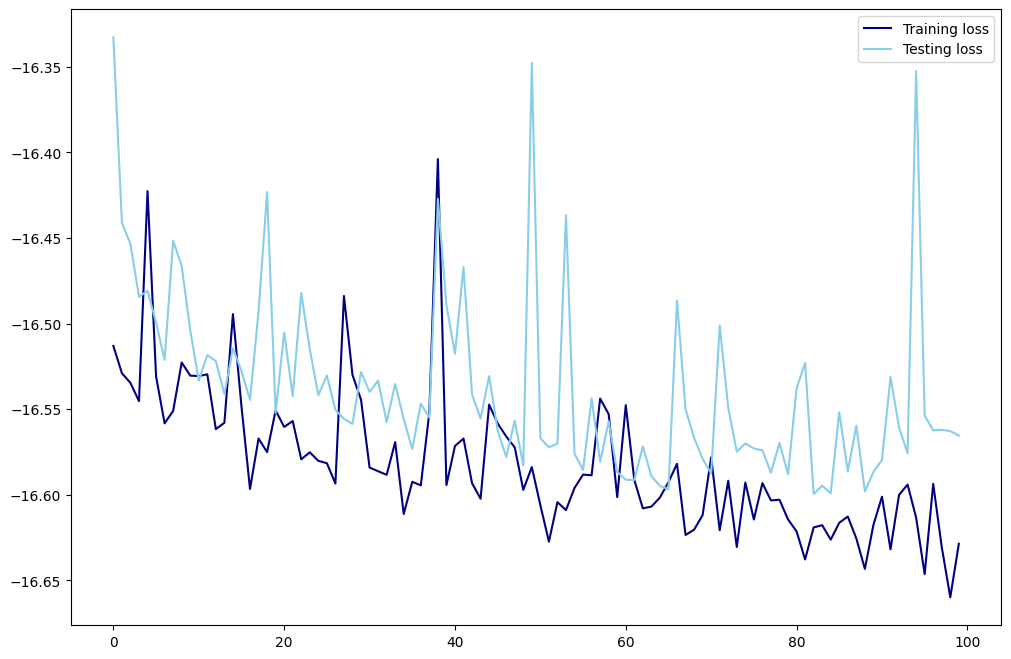

In [20]:
# Visualize the loss
train_loss = history_diff.history['loss']
test_loss = history.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();


### Part 6

Let's make a second network that is a bit deeper and more complex. Also, let's now use all the features and see if we help the model.  Use 3 layers, with 64, 128, and 64 nodes respectively in the hidden layers and a `ReLU` activation function.

In [23]:
#Structure
model = Sequential()

# Input layer
model.add(Dense(16, activation='relu', input_shape=(8,)))

# Hidden layers
model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
          
# Outer layer - what activation would be appropriate
model.add(Dense(1, activation=None))

In [24]:
# Compile
model.compile(loss="mse", optimizer = "adam", metrics = ["accuracy"])

In [25]:
# Fit
history = model.fit(X_train_sc, y_train, epochs=100,
                    batch_size = 64,
                    verbose = 0,
                    validation_data= (X_test_sc, y_test)
                   )

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                144       
                                                                 
 dense_4 (Dense)             (None, 64)                1088      
                                                                 
 dense_5 (Dense)             (None, 128)               8320      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17,873
Trainable params: 17,873
Non-trainable params: 0
_________________________________________________________________


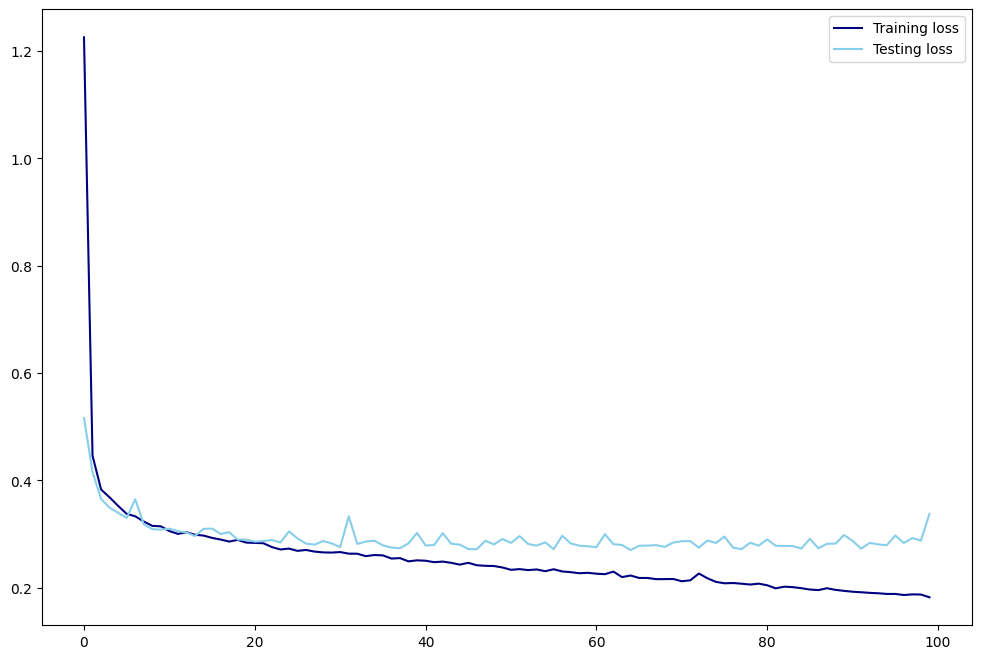

In [30]:
# Visualize the loss
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

### Part 7

Add a `BatchNormalization` layer prior to our first dense layer in the network above and repeat the fit.

##### Does this change anything?

In [31]:
# . Structure/topology
model = Sequential()

# Input layer
model.add(Dense(16, activation='relu', input_shape=(8,)))

# Hidden layers
BatchNormalization()
model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
          
# Outer layer - what activation would be appropriate
model.add(Dense(1, activation=None))

In [32]:
# Compile
model.compile(loss="mse", optimizer = "adam", metrics = ["accuracy"])

In [33]:
#  Fit
history = model.fit(X_train_sc, y_train, epochs=100,
                    batch_size = 64,
                    verbose = 0,
                    validation_data= (X_test_sc, y_test)
                   )


In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                144       
                                                                 
 dense_9 (Dense)             (None, 64)                1088      
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 17,873
Trainable params: 17,873
Non-trainable params: 0
_________________________________________________________________


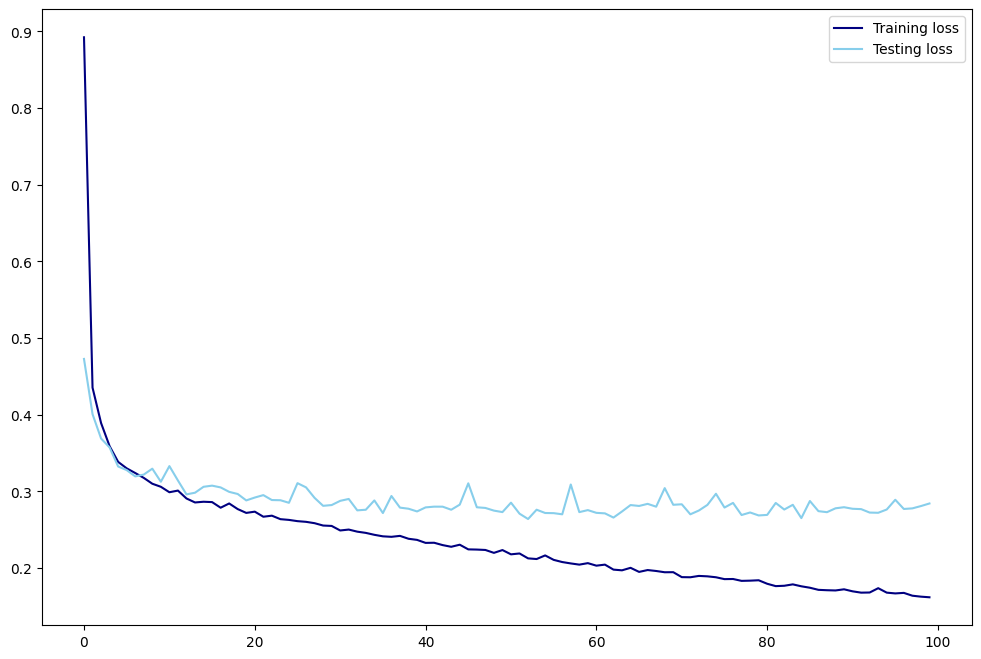

In [35]:
# Visualize the loss
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

### Part 8

Early Stopping.  It seems that we may not need all 100 epochs to train the data.  Include an `EarlyStopping` callback in your model from above.  Set the `patience` equal to 5.  How many epochs do you think are appropriate?

In [39]:
es = EarlyStopping(patience=5)

# Structure/topology
model = Sequential()

# Input layer
model.add(Dense(16, activation='relu', input_shape=(8,)))

# Hidden layers
model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
          
# Outer layer - what activation would be appropriate
model.add(Dense(1, activation=None))

In [40]:
# Compile
model.compile(loss="mse", optimizer = "adam", metrics = ["accuracy"])

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 16)                144       
                                                                 
 dense_14 (Dense)            (None, 64)                1088      
                                                                 
 dense_15 (Dense)            (None, 128)               8320      
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 17,873
Trainable params: 17,873
Non-trainable params: 0
_________________________________________________________________


In [43]:
# 3. Fit
history = model.fit(X_train_sc, y_train, epochs=100,
                    batch_size = 64,
                    verbose = 0,
                    callbacks = [es],
                    validation_data= (X_test_sc, y_test)
                   )

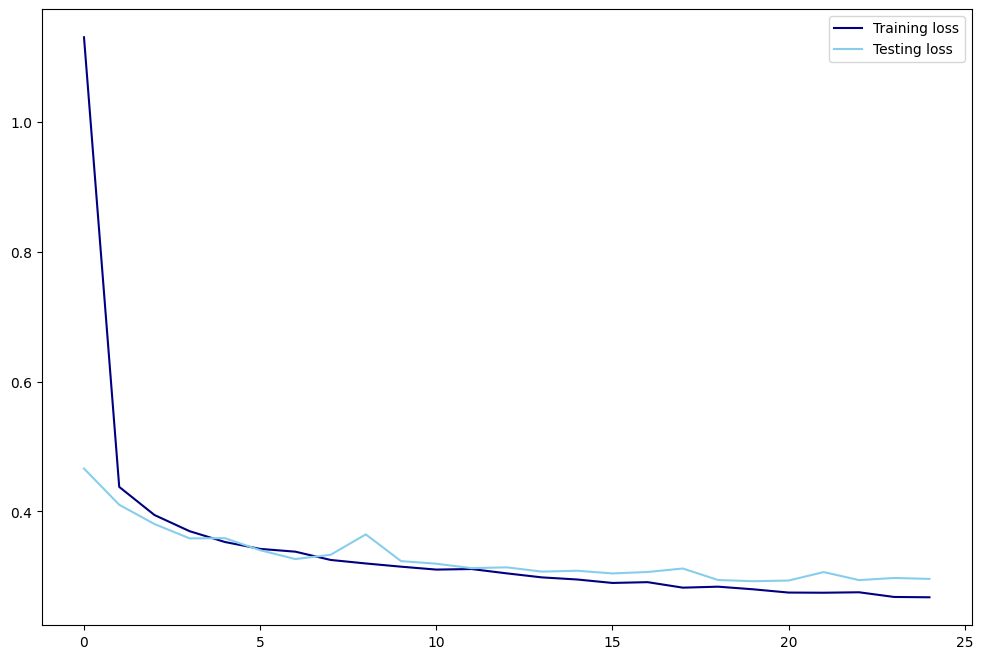

In [44]:
# Visualize the loss
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

### Part 9

Adding `Dropout`.  Let's add a 5% dropout to the second layer, and a 20% dropout to the third layer and see if we end up stopping sooner or performing better.

In [45]:
# Structure/topology
model = Sequential()

# Input layer
model.add(Dense(16, activation='relu', input_shape=(8,)))

# Hidden layers
model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.05))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
          
# Outer layer - what activation would be appropriate
model.add(Dense(1, activation=None))

In [46]:
# Compile
model.compile(loss="mse", optimizer = "adam", metrics = ["accuracy"])

In [47]:
# Fit
history = model.fit(X_train_sc, y_train, epochs=100,
                    batch_size = 64,
                    verbose = 0,
                    callbacks = [es],
                    validation_data= (X_test_sc, y_test)
                   )

In [48]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 16)                144       
                                                                 
 dense_19 (Dense)            (None, 64)                1088      
                                                                 
 dense_20 (Dense)            (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 1)                

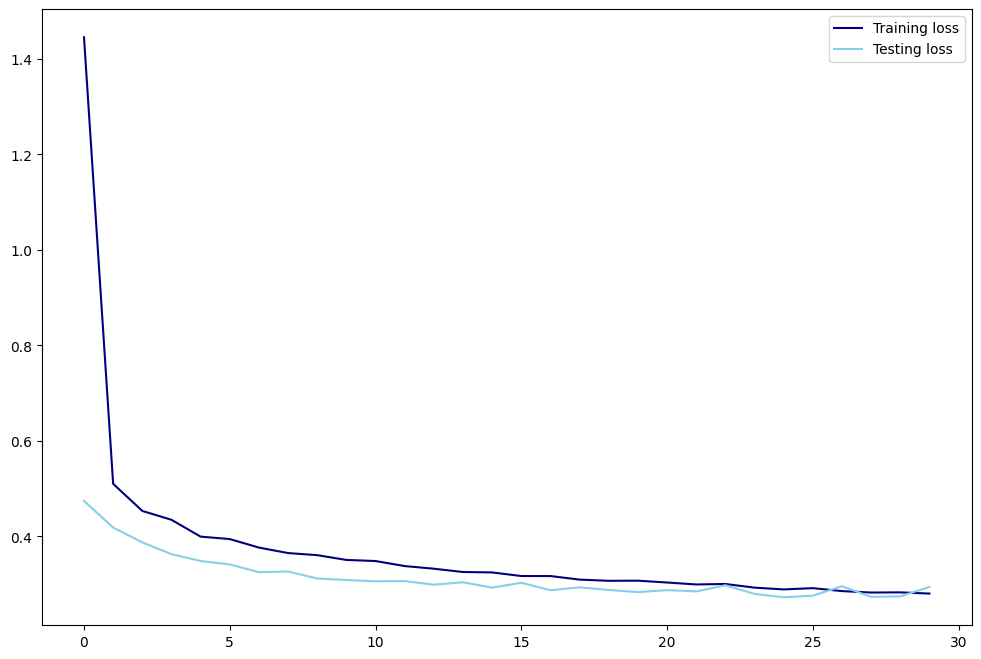

In [49]:
# Visualize the loss
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

### Part 9 - continued: RMSE vs. Baseline

Compare the model aboves performance to that of the baseline model for the data.

### Part 10: Regularization and Scaling

Finally, we want to see if regularizing will improve the model.  Feed a model that is identical to the one above including dropout and include `l2` regularization in each of the dense layers of 0.01.  What is the RMSE of this model?  How does it compare to the baseline?

In [51]:
# Structure/topology
model = Sequential()

# Input layer
model.add(Dense(16, activation='relu', input_shape=(8,)))

# Hidden layers
model.add(Dense(64, activation="relu", kernel_regularizer=l2(0.01)))
model.add(Dense(128, activation="relu", kernel_regularizer=l2(0.01)))
model.add(Dropout(0.05))
model.add(Dense(64, activation="relu", kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
          
# Outer layer - what activation would be appropriate
model.add(Dense(1, activation=None))

In [52]:
# Compile
model.compile(loss="mse", optimizer = "adam", metrics = ["accuracy"])

In [53]:
# Fit
history = model.fit(X_train_sc, y_train, epochs=100,
                    batch_size = 64,
                    verbose = 0,
                    callbacks = [es],
                    validation_data= (X_test_sc, y_test)
                   )

In [54]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 16)                144       
                                                                 
 dense_24 (Dense)            (None, 64)                1088      
                                                                 
 dense_25 (Dense)            (None, 128)               8320      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_27 (Dense)            (None, 1)                

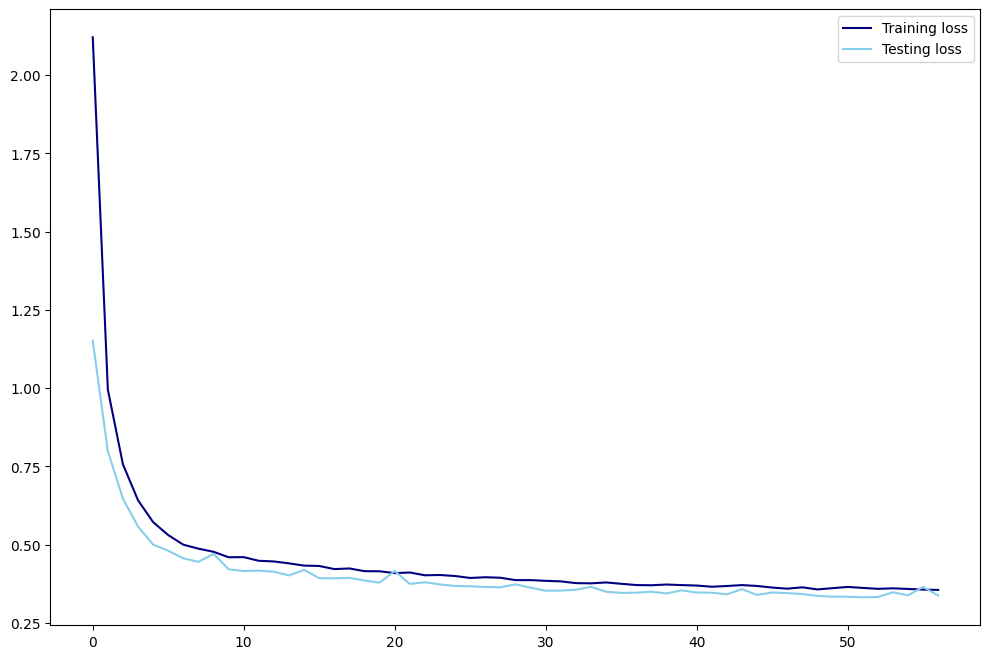

In [55]:
# Visualize the loss
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

### Part 11: Saving the Model

Save the model as `cali_housing.h5`.  

In [57]:
model.save('cali_housing.h5')